In [1]:
using DifferentialEquations, Plots, ODE, ODEInterfaceDiffEq, LSODA, Distributions
include("reaction.jl")

params = [rand(LogNormal(0.1, 0.25)) for i=1:Nparams];

params[20] = tanh(params[20])*0.9;

In [2]:
ILs, surface, endosome, trafP = fullParam(params)

prob = ODEProblem(fullDeriv, solveAutocrine(trafP), (0.0, 100000.0), params);

sol = solve(prob,CVODE_BDF(),abstol=1/10^16,reltol=1/10^16);
test_sol = TestSolution(sol);

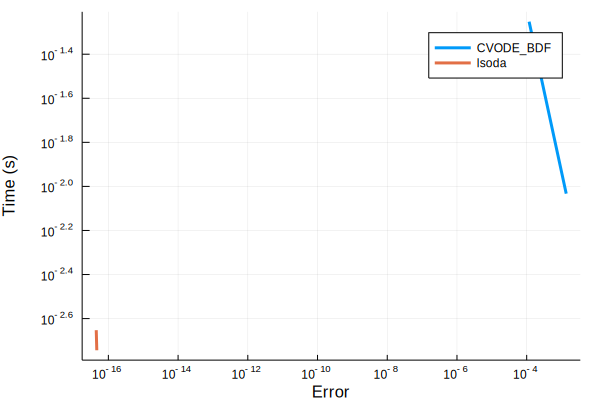

In [5]:
abstols = (1/10).^(LinRange(4, 6, 2))
reltols = (1/10).^(LinRange(2, 3, 2));

# Terrible: GRK4A, Rosenbrock32
# Mediocre: GRK4T
# Rodas4 = Rodas5 = Rodas4P

setups = [Dict(:alg=>CVODE_BDF()),
          Dict(:alg=>lsoda())]
wp = WorkPrecisionSet(prob, abstols, reltols, setups; verbose=false, save_everystep=false, appxsol=test_sol, maxiters=Int(1e5))
plot(wp)